In [1]:
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import scatter_matrix

import matplotlib.dates as mdates
from itertools import chain

# Data Preparation
##### The following is cleaning and preparing data. There is no need to run it multiple times.

In [2]:
# Load and clean data from Steam Charts data file, scrapped by Alex. Do not run this again.
data = pd.read_csv('../Alex/Data_Scraping/GamesData.csv',index_col=False)

# Clean data
data = data.iloc[2:].reset_index(drop=True)#.drop(columns='Unnamed: 0')

# Make percentile into number and clear "-"
data = data.replace(to_replace='%', value='', regex=True).replace({'-':'NaN'})
data = data[2:].reset_index(drop=True).drop(columns='Unnamed: 0')

data = data.rename(columns=lambda x: x.replace('_', ' '))
data = data.rename(columns={'App id':'App_id','Avg Players':'Avg_Players', 'Peak Players':'Peak_Players','Perc Gain': 'Perc_Gain'}, errors="raise")

# Save the cleaned data as 'SteamCharts.csv'
data.to_csv('SteamCharts.csv',index=False)

In [3]:
# Load data from 'SteamCharts.csv' data file
data = pd.read_csv('SteamCharts.csv',index_col=False,low_memory=False)

# Get Perc_Gain.
p_gain = data.loc[data['Perc_Gain']==1]
p_gain = p_gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
p_gain_pure = p_gain.drop(columns=['App_id', 'Name']).astype(float)

# Get Avg_Players.
avg_players = data.loc[data['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)

# Get Peak_Players.
peak_players = data.loc[data['Peak_Players']==1]
peak_players = peak_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
peak_pure = peak_players.drop(columns=['App_id', 'Name']).astype(float)

# Add columns of max and mean
avg_players['max'] = avg_pure.max(axis=1)
avg_players['mean'] = avg_pure.mean(axis=1)

peak_players['peak_max'] = peak_pure.max(axis=1)
peak_players['peak_mean'] = peak_pure.mean(axis=1)

In [4]:
# Load data from Steam Spy data files. Do not run this, or download 'steamspy_owners.csv' and 'games-features-metacritic-new.csv' before you run:
steamspy = pd.read_csv('steamspy_owners.csv')
steamspy = steamspy.rename(columns={'QueryID':'App_id','0':'SteamSpyOwnersNew'}, errors="raise")

features = pd.read_csv('games-features-metacritic-new.csv',index_col=False)
features = features.drop_duplicates(subset=['QueryID','QueryName'], keep='first', inplace=False, ignore_index=False)
features = features.drop(columns=['ResponseID', 'ResponseName'])
features = features.rename(columns={'QueryID':'App_id','QueryName':'Name'}, errors="raise")

# Combine data from Steam Charts and Steam Spy, order it by 'max' and save it as 'AllData.csv'
data_all = pd.merge(features, steamspy[['App_id','SteamSpyOwnersNew']], how='inner', on=['App_id'])
data_all = pd.merge(data_all, peak_players[['App_id','peak_max','peak_mean']], how='inner', on=['App_id'])
data_all = pd.merge(data_all, avg_players[['App_id','max','mean']], how='inner', on=['App_id'])
data_all.sort_values(by=['max'], ascending=False, inplace=True)

data_all.reset_index(drop=True).drop(columns='Unnamed: 0').drop_duplicates(subset=['Name'], keep='first', inplace=False, ignore_index=False).to_csv('AllData.csv',index=False)

# Explanation of the data

The file `SteamCharts.csv` contains monthly data during July 2012 to April 2021 including
- 'Avg_Players': the daily average number of players per month; 
- 'Peak_Players': the daily peak number of players per month;
- 'Gain'
- 'Perc_Gain'  

obtained from [Steam Charts](https://steamcharts.com/).

The file `AllData.csv` contains 70+ game features (obtained from [Steam Spy](https://steamspy.com/)), together with the max and mean of 'Avg_Players' and the max and mean of 'Peak_Players'. This file is a combination of Steam Spy data and Steam Charts data through the common 'App_id's. It is currently sorted by the max of 'Avg_Players'.


In [5]:
data_charts = pd.read_csv('SteamCharts.csv',index_col=False,low_memory=False)

# Get Avg_Players.
avg_players = data_charts.loc[data_charts['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)

# Get Peak_Players.
peak_players = data_charts.loc[data_charts['Peak_Players']==1]
peak_players = peak_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
peak_pure = peak_players.drop(columns=['App_id', 'Name']).astype(float)

# Get Perc_Gain.
p_gain = data_charts.loc[data_charts['Perc_Gain']==1]
p_gain = p_gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
p_gain_pure = p_gain.drop(columns=['App_id', 'Name']).astype(float)

# Get Gain.
gain = data_charts.loc[data_charts['Gain']==1]
gain = gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
gain_pure = gain.drop(columns=['App_id', 'Name']).astype(float)

Here we plot the time series data for some games.

In [6]:
plt.style.use('dark_background')

In [7]:
avg_players=avg_players.reset_index(drop=True)
game_index=[]
game_index.append(avg_players[avg_players['Name']=='Day of Defeat'].index[0])
game_index.append(avg_players[avg_players['Name']=='Counter-Strike'].index[0])
avg_players.iloc[game_index]

,Name,App_id,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
1811,Day of Defeat,30,103.37,105.42,112.93,117.04,112.77,109.85,104.98,101.19,...,217.9,297.55,318.41,319.62,318.08,303.99,297.0,289.59,304.47,331.84
68,Counter-Strike,10,12426.28,12311.34,12091.33,13094.31,12239.53,11278.70,10320.58,9983.94,...,21204.46,24139.15,28378.42,34814.47,31996.07,29669.97,28836.29,29432.56,33095.8,34139.20


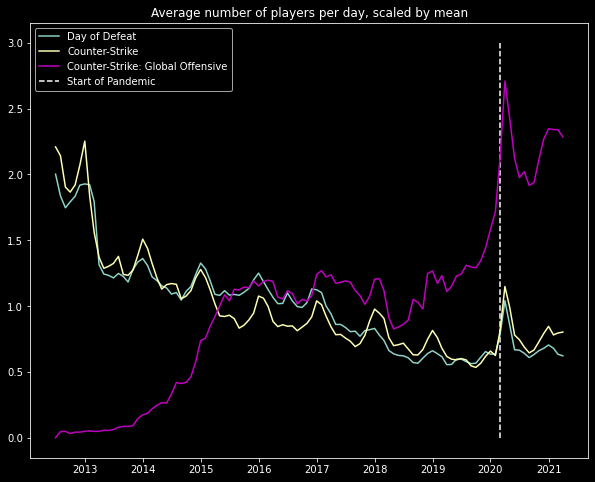

In [8]:
months= pd.to_datetime(avg_players.drop(columns=['Name','App_id']).columns)
fig=plt.figure(figsize=(10,8))
for i in game_index:
    plot_data=avg_pure.iloc[i]/avg_pure.iloc[i].mean()
    plt.plot(months,plot_data,label = avg_players.Name[i])
plt.plot(months,avg_pure.iloc[0]/avg_pure.iloc[0].mean(),'m',label = avg_players.Name[0])
plt.title('Average number of players per day, scaled by mean')   
plt.vlines(pd.to_datetime('March 2020'),0,3,linestyles='dashed',label='Start of Pandemic')
plt.legend()
plt.show()

fig.savefig('ExamplePlot1.png',bbox_inches="tight")

In [9]:
data = pd.read_csv('AllData.csv')
print('There are '+str(len(data))+' games that has data both in Steam Charts and Steam Spy.')

There are 10576 games that has data both in Steam Charts and Steam Spy.


In [10]:
data = pd.read_csv('AllData.csv')
cutoff = 10
data = data.loc[data['mean']>10]

print('There are '+str(len(data))+' games whose average number of players per month is larger than '+str(cutoff)+'.')

There are 5090 games whose average number of players per month is larger than 10.


In [11]:
data = pd.read_csv('AllData.csv')
data = data.loc[data['Metacritic']>-1]

print('There are '+str(len(data))+' games with a metacritic score.')

There are 2194 games with a metacritic score.


In [12]:
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]

print('There are '+str(len(data))+' games with metacritic score and whose average number of players per month is larger than '+str(cutoff)+'.')

There are 1647 games with metacritic score and whose average number of players per month is larger than 10.


Here are the game features in our data:

In [13]:
data.columns

Index(['App_id', 'Name', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'Genr

# Exploratory Data Analysis

Let us first take a look at the games with metacritic score and whose average number of players per month is larger than 10.

### How games in 4 different grades are distributed in each genre?

In this part, we rank the game according to average number of players/ peak number of players/ metacritic scores. And divide the games equally into 4 grades according tot he ranks.

In [14]:
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]

data['GenreIsGame'] = 1 -data['GenreIsNonGame']
data['GenreIsGame'] = data['GenreIsGame'].astype('bool')

genre = [#'GenreIsGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer']

genre_name = [#'IsGame',
       'Indie', 'Action', 'Adventure', 'Casual',
       'Strategy', 'RPG', 'Simulation',
       'EarlyAccess', 'Free', 'Sports',
       'Racing', 'MassivelyMultiplayer']

In [15]:
def plot_grading(data, method, ranks,no_grades=4):
    data.sort_values(by=[method ], ascending=False, inplace=True)#.reset_index(drop=True)
    grade = list(range(1,len(ranks)+1))
    a = np.array(ranks[1:]+[len(data)] ) - np.array([0] + ranks[1:])
    grades = []
    for i in range(len(grade)):
        grades.append( [grade[i]]*a[i] )    
    grades = list(chain(*grades))
    data['grade'] = grades
    cutoffs=np.round(data.iloc[ranks][method].values,2)

    b=[]
    b_perc=[]
    for j in range(len(genre)):
        sub_data = data.loc[data[genre[j]]==True]
        b.append( [len(sub_data.loc[sub_data['grade']==i]) for i in range(1,len(grade)+1)])
        b_perc.append(np.array(b[j])/len(sub_data) )

    new_df = pd.DataFrame(b, columns=["Grade 1 (>"+str(cutoffs[0])+")", "Grade 2 ("+str(cutoffs[1])+"~"+str(cutoffs[0])+")", 
                                  "Grade 3 ("+str(cutoffs[2])+"~"+str(cutoffs[1])+")", "Grade 4 (<"+str(cutoffs[2])+")"], index =genre_name)
    perc_df = pd.DataFrame(b_perc, columns=["Grade 1 (>"+str(cutoffs[0])+")", "Grade 2 ("+str(cutoffs[1])+"~"+str(cutoffs[0])+")", 
                                  "Grade 3 ("+str(cutoffs[2])+"~"+str(cutoffs[1])+")", "Grade 4 (<"+str(cutoffs[2])+")"], index =genre_name)

    ax = new_df.plot.barh(stacked=True,title='Graded by ' +str(method))
#fig = ax.get_figure()
#fig.savefig('figure1.png',bbox_inches="tight")

    ax = perc_df.plot.barh(stacked=True,title='Percentage of games ('+' graded by metacritic)')
#fig = ax.get_figure()
#fig.savefig('figure2.png',bbox_inches="tight")

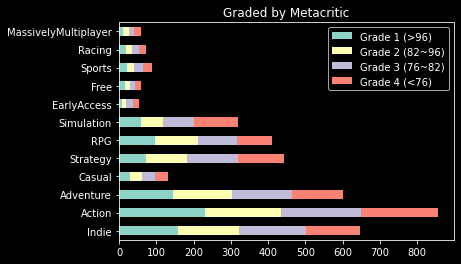

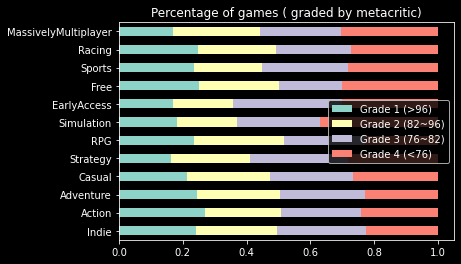

In [16]:
no_grades=4
ranks = list(np.arange(0,len(data), int(len(data)/no_grades)+1))
plot_grading(data,'Metacritic',ranks)

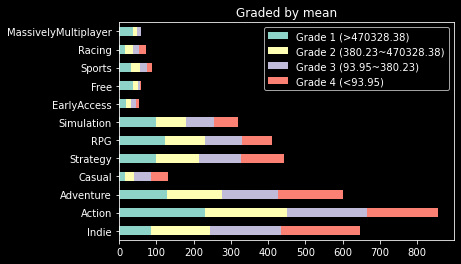

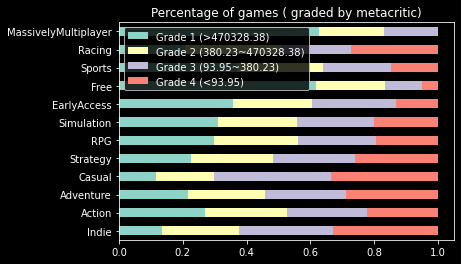

In [17]:
no_grades=4
ranks = list(np.arange(0,len(data), int(len(data)/no_grades)+1))
plot_grading(data,'mean',ranks)

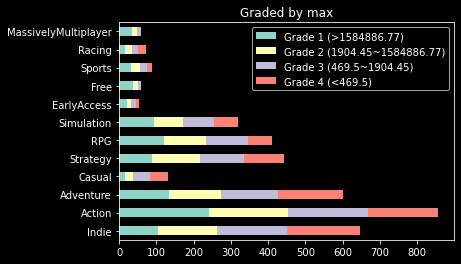

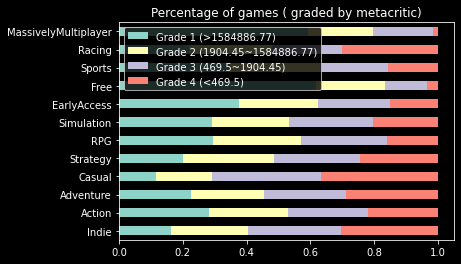

In [18]:
no_grades=4
ranks = list(np.arange(0,len(data), int(len(data)/no_grades)+1))
plot_grading(data,'max',ranks)

### How different genres are distributed in each grade?

In this part, we rank the games more freely, i.e. there is no need to distribute them evenly.

In [31]:
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]

In [32]:
#standard: a column name used to rank the games
#ranks: a list of rank cutoffs

def grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=(12,12)):
       
    grade = list(range(1,len(ranks)+1))
    a = np.array(ranks[1:]+[len(data)] ) - np.array( [0] + ranks[1:])
    grades = []
    for i in range(len(grade)):
        grades.append( [grade[i]]*a[i] )    
    grades = list(chain(*grades))
    
    # Sort data according to the 'standard'
    data_copy=data.copy()
    data_copy.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
    avg_graded = data_copy#.loc[data[standard]>=1].copy()

    # Rank the games
    if plot_cutoff:
        print('Using '+str(standard)+' :')
        for i in ranks:
            print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

    cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
    #counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
    #print(counts)

    #avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
    avg_graded['Grade'] = grades

    data_clean = avg_graded[genre+['Grade']]

#threshold = .2
#data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

    data_clean.columns = genre_name+['Grade']

    data_test = {}
    for i in grade:
        data_test[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
        
    if plot_figures:
        plt.figure(figsize=fig_size)
        for i in grade:
            plt.plot(data_test[i].columns,data_test[i].mean(),label='Grade '+str(i))

        plt.legend()
        plt.title('By max of Avg_players')
        plt.show()
    return data_test

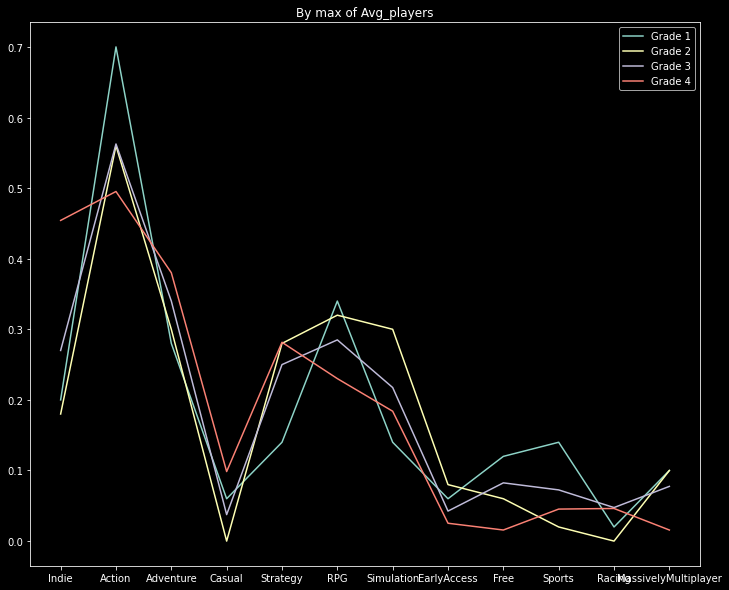

In [37]:
# We plot one figure given one ranking method here:
fig_size=(12,10)
ranks = [0,50,100,500]
data_max = grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=fig_size)

In [34]:
# This function plots different methods together:
def grade_analysis_plot_all(methods,ranks,fig_size=(24,6)):
    fig,ax=plt.subplots(1,len(methods),figsize=fig_size)
    for j in range(len(methods)):
        data_copy = grade_analysis(ranks,standard= methods[j], plot_figures=False)
        for i in list(range(1,len(ranks)+1)):    
            ax[j].plot(data_copy[i].columns,data_copy[i].mean(),label='Grade '+str(i))
            ax[j].set_title('By '+str(methods[j]))
        ax[j].legend()
    plt.show()

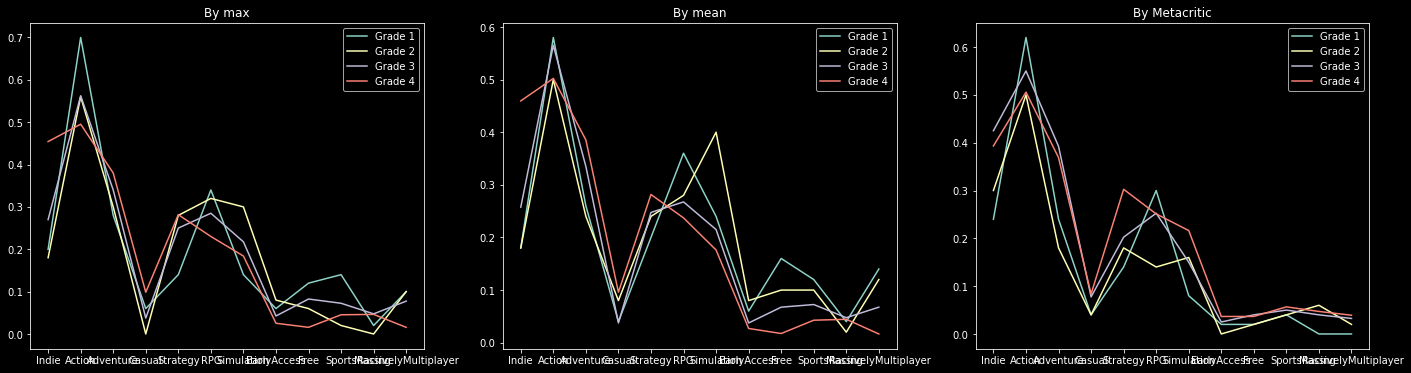

Rank cutoffs are [0, 50, 100, 500]


In [36]:
methods = ['max','mean','Metacritic']
ranks = [0,50,100,500]
grade_analysis_plot_all(methods,ranks,fig_size=(24,6))
print('Rank cutoffs are '+str(ranks))

## For continuous variables

Here we plot scatter matrix.

In [139]:
data=pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]
data.columns

Index(['App_id', 'Name', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'Genr

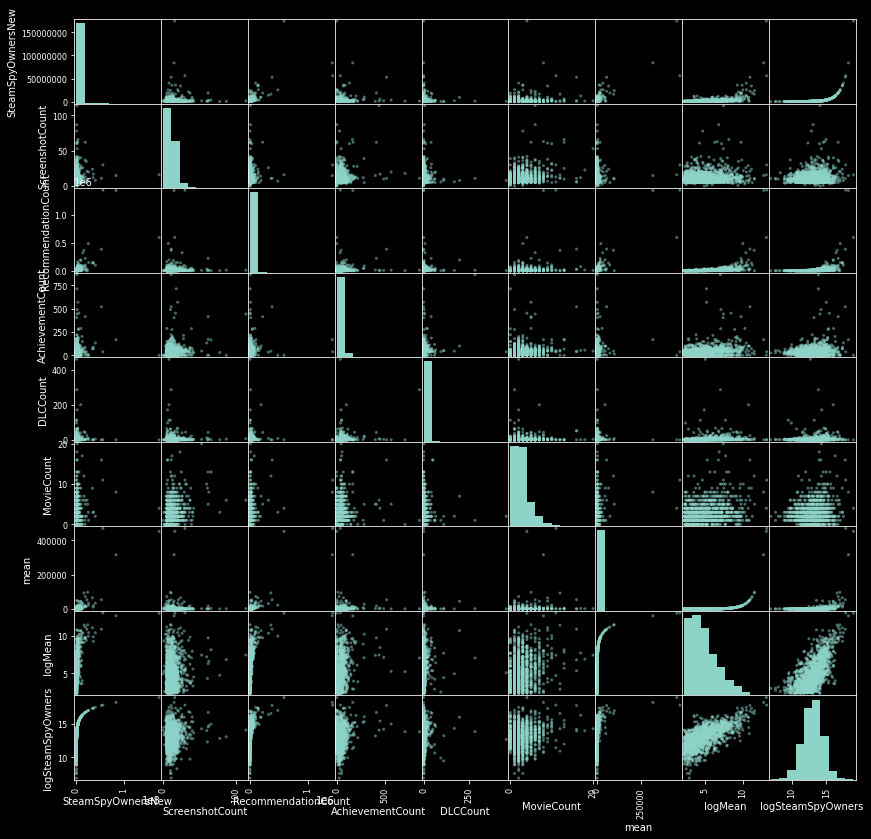

In [170]:
data_test = data[[ 'SteamSpyOwnersNew','ScreenshotCount', 'RecommendationCount',
                  'AchievementCount', #'AchievementHighlightedCount',
        'DLCCount', 'MovieCount','mean',
                 #'Metacritic'
                 ]].astype(float).copy()

data_test['logMean']=np.log(data_test['mean'])
data_test['logSteamSpyOwners']=np.log(data_test['SteamSpyOwnersNew'])
scatter_matrix(data_test,figsize=(14,14))
plt.show()

## For categorical variables

In [63]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [105]:
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]

data['GenreIsGame'] = 1 -data['GenreIsNonGame']
data['GenreIsGame'] = data['GenreIsGame'].astype('bool')

genre = [#'GenreIsGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer']

genre_name = [#'IsGame',
       'Indie', 'Action', 'Adventure', 'Casual',
       'Strategy', 'RPG', 'Simulation',
       'EarlyAccess', 'Free', 'Sports',
       'Racing', 'MassivelyMultiplayer']
genre_name+['mean']

['Indie',
 'Action',
 'Adventure',
 'Casual',
 'Strategy',
 'RPG',
 'Simulation',
 'EarlyAccess',
 'Free',
 'Sports',
 'Racing',
 'MassivelyMultiplayer',
 'mean']

#### Multiple histograms

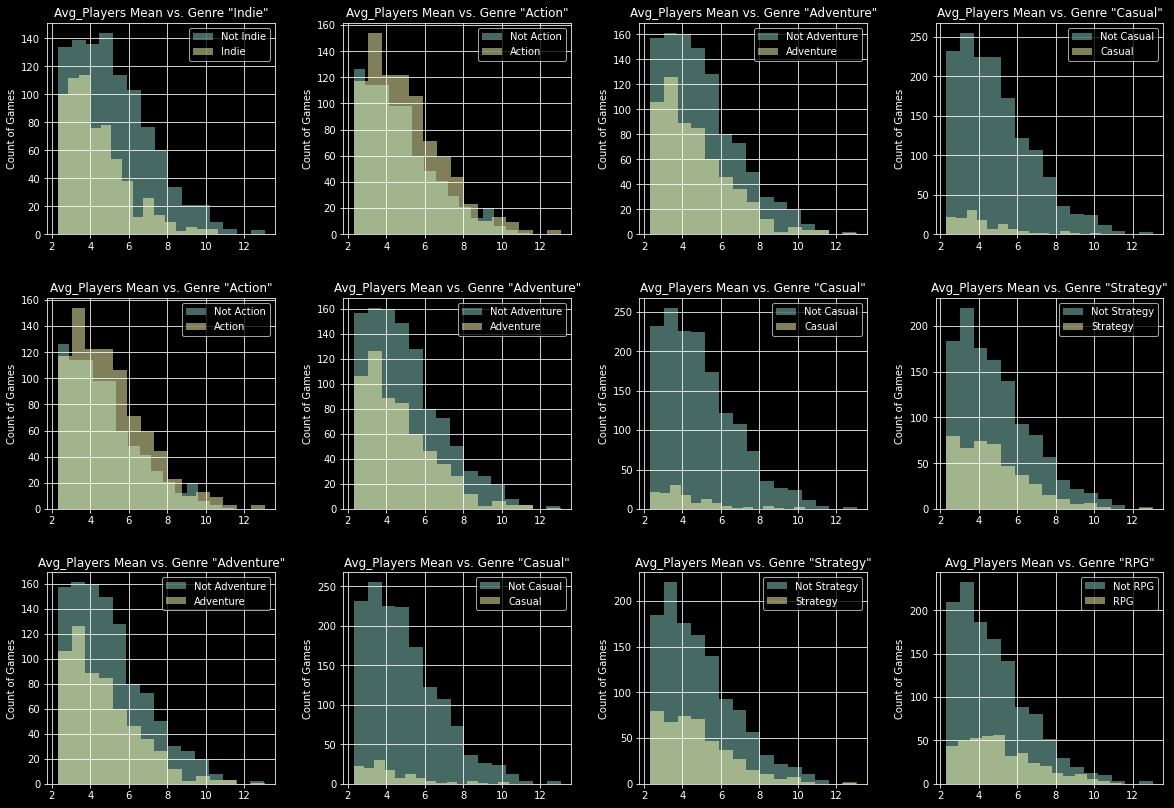

In [164]:
df=data[genre+['mean']].copy()
df['mean']=np.log(df['mean'])
n = len(genre)
n_x = 3
n_y = int(n/n_x)
fig,ax=plt.subplots(n_x,n_y,figsize=(20,14))
for i in range(n_x):
    for j in range(n_y):
        df[df[genre[i+j]]==0].hist(column=["mean"], bins=15, alpha=0.5, label='Not '+str(genre_name[i+j]),ax=ax[i,j])
        df[df[genre[i+j]]==1].hist(column=["mean"], bins=15, alpha=0.5, label=genre_name[i+j],ax=ax[i,j])
        ax[i,j].set_ylabel('Count of Games')
        ax[i,j].set_xlabel('')
        ax[i,j].legend()
        ax[i,j].set_title('Avg_Players Mean vs. Genre "'+str(genre_name[i+j])+'"')
plt.show()

fig.savefig('Histogream.png',bbox_inches="tight")

#### Multiple density estimate plots

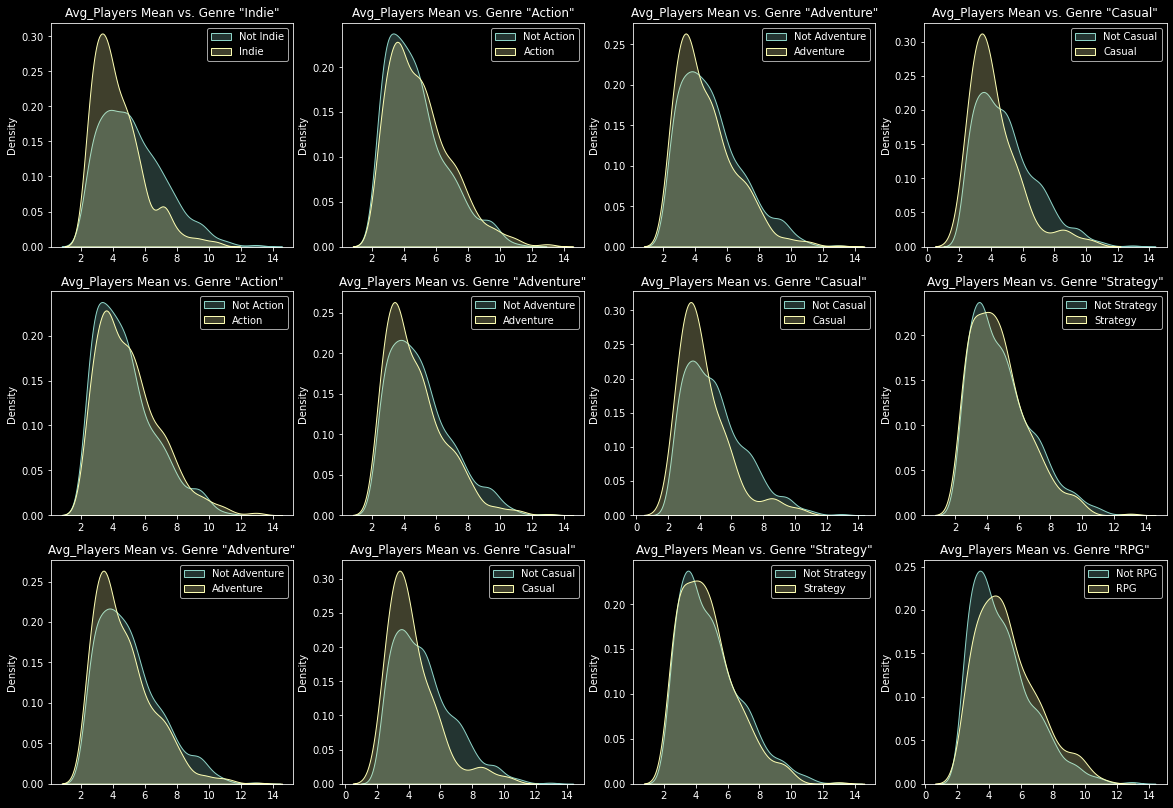

In [165]:
fig,ax=plt.subplots(n_x,n_y,figsize=(20,14))
for i in range(n_x):
    for j in range(n_y):
        sns.kdeplot(df[df[genre[i+j]]==0]["mean"],shade=True,label='Not '+str(genre_name[i+j]),ax=ax[i,j])
        sns.kdeplot(df[df[genre[i+j]]==1]["mean"],shade=True,label=genre_name[i+j],ax=ax[i,j])
        ax[i,j].set_ylabel('Density')
        ax[i,j].set_xlabel('')
        ax[i,j].legend()
        ax[i,j].set_title('Avg_Players Mean vs. Genre "'+str(genre_name[i+j])+'"')

plt.legend()
plt.show()
fig.savefig('Density.png',bbox_inches="tight")